## Proyecto DMD 

## Código 1

In [1]:
import numpy as np

# Define la función magnus_proyectil
def magnus_proyectil(t, x, w):
    D = 7.2008e-2  # Diámetro
    m = 1.5947e-1  # Masa
    k = 1.22 * np.pi * D**2 / (8 * m)
    Cd = 0.45
    wRot = np.linalg.norm(w)  # Magnitud del vector de velocidad angular
    Cl = 0.3187 * (1 - np.exp(-2.483e-3 * wRot))
    
    # x[0] es y, x[1] es dy/dt, x[2] es z, x[3] es dz/dt, x[4] es x, x[5] es dx/dt
    v = np.sqrt(x[1]**2 + x[3]**2 + x[5]**2)  # Velocidad
    
    if wRot != 0:
        der = [
            x[1],
            -k * v * (Cd * x[1] - Cl * (w[1] * x[5] - w[2] * x[3]) / wRot),
            x[3],
            -k * v * (Cd * x[3] - Cl * (w[2] * x[1] - w[0] * x[5]) / wRot),
            x[5],
            -9.8 - k * v * (Cd * x[5] - Cl * (w[0] * x[3] - w[1] * x[1]) / wRot)
        ]
    else:
        der = [
            x[1],
            -k * v * Cd * x[1],
            x[3],
            -k * v * Cd * x[3],
            x[5],
            -9.8 - k * v * Cd * x[5]
        ]
    
    return der


## Código 2

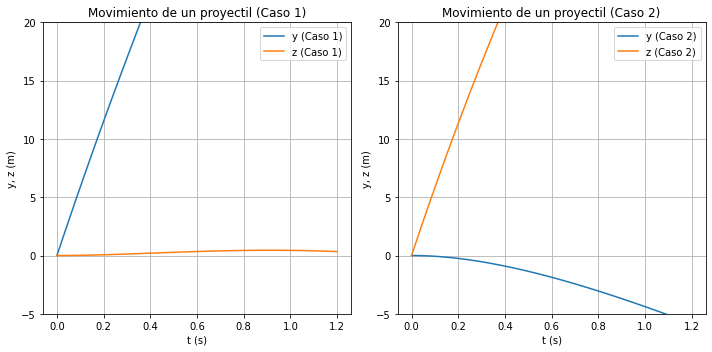

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición del vector global de velocidad angular
w = np.array([600, 0, 0])  # Velocidad angular de rotación paralela al eje X

# Definición de la función magnus_proyectil
def magnus_proyectil(t, x):
    D = 7.2008e-2  # Diámetro
    m = 1.5947e-1  # Masa
    k = 1.22 * np.pi * D**2 / (8 * m)
    Cd = 0.45
    wRot = np.linalg.norm(w)  # Magnitud del vector de velocidad angular
    Cl = 0.3187 * (1 - np.exp(-2.483e-3 * wRot))
    
    v = np.sqrt(x[1]**2 + x[3]**2 + x[5]**2)  # Velocidad
    
    if wRot != 0:
        der = [
            x[1],
            -k * v * (Cd * x[1] - Cl * (w[1] * x[5] - w[2] * x[3]) / wRot),
            x[3],
            -k * v * (Cd * x[3] - Cl * (w[2] * x[1] - w[0] * x[5]) / wRot),
            x[5],
            -9.8 - k * v * (Cd * x[5] - Cl * (w[0] * x[3] - w[1] * x[1]) / wRot)
        ]
    else:
        der = [
            x[1],
            -k * v * Cd * x[1],
            x[3],
            -k * v * Cd * x[3],
            x[5],
            -9.8 - k * v * Cd * x[5]
        ]
    
    return der

# Condiciones iniciales para los dos casos
x0_case1 = [0, 0, 0, 60, 0, 0]  # Caso 1: Velocidad inicial en Y
x0_case2 = [0, 0, 0, 0, 0, 60]  # Caso 2: Velocidad inicial en Z

# Intervalo de tiempo
t_span = [0, 1.2]

# Resolución del sistema para ambos casos
sol_case1 = solve_ivp(magnus_proyectil, t_span, x0_case1, t_eval=np.linspace(0, 1.2, 100))
sol_case2 = solve_ivp(magnus_proyectil, t_span, x0_case2, t_eval=np.linspace(0, 1.2, 100))

# Gráficas
plt.figure(figsize=(10, 5))

# Gráfica para el caso 1
plt.subplot(1, 2, 1)
plt.plot(sol_case1.t, sol_case1.y[2], label='y (Caso 1)')
plt.plot(sol_case1.t, sol_case1.y[4], label='z (Caso 1)')
plt.grid(True)
plt.ylim([-5, 20])
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('y, z (m)')
plt.title('Movimiento de un proyectil (Caso 1)')

# Gráfica para el caso 2
plt.subplot(1, 2, 2)
plt.plot(sol_case2.t, sol_case2.y[2], label='y (Caso 2)')
plt.plot(sol_case2.t, sol_case2.y[4], label='z (Caso 2)')
plt.grid(True)
plt.ylim([-5, 20])
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('y, z (m)')
plt.title('Movimiento de un proyectil (Caso 2)')

plt.tight_layout()
plt.show()


## Código 3

In [3]:
def stop_magnus_1(t, x):
    detect = x[4]  # z, equivalente a x(5) en MATLAB
    return detect

# Configuración del evento
stop_magnus_1.terminal = True  # Detener la integración cuando se cumple la condición
stop_magnus_1.direction = -1   # Detectar el cruce en la dirección descendente


## Código 4

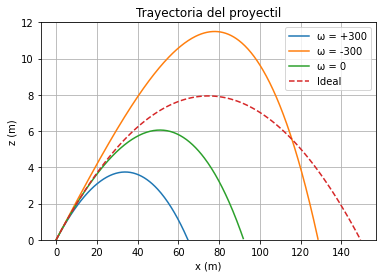

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición de la función magnus_proyectil (reutilizada de antes)
def magnus_proyectil(t, x):
    D = 7.2008e-2
    m = 1.5947e-1
    k = 1.22 * np.pi * D**2 / (8 * m)
    Cd = 0.45
    wRot = np.linalg.norm(w)
    Cl = 0.3187 * (1 - np.exp(-2.483e-3 * wRot))
    v = np.sqrt(x[1]**2 + x[3]**2 + x[5]**2)
    
    if wRot != 0:
        der = [
            x[1],
            -k * v * (Cd * x[1] - Cl * (w[1] * x[5] - w[2] * x[3]) / wRot),
            x[3],
            -k * v * (Cd * x[3] - Cl * (w[2] * x[1] - w[0] * x[5]) / wRot),
            x[5],
            -9.8 - k * v * (Cd * x[5] - Cl * (w[0] * x[3] - w[1] * x[1]) / wRot)
        ]
    else:
        der = [
            x[1],
            -k * v * Cd * x[1],
            x[3],
            -k * v * Cd * x[3],
            x[5],
            -9.8 - k * v * Cd * x[5]
        ]
    
    return der

# Evento para detener la integración cuando z = 0
def stop_magnus_1(t, x):
    return x[4]

stop_magnus_1.terminal = True
stop_magnus_1.direction = -1

# Condiciones iniciales
th = 12 * np.pi / 180  # Ángulo de disparo en radianes
v0 = 60  # Velocidad inicial
x0 = [0, v0 * np.cos(th), 0, 0, 0, v0 * np.sin(th)]  # [x(0), vx(0), y(0), vy(0), z(0), vz(0)]
T = v0 * np.sin(th) / 4.9  # Tiempo sin rozamiento

# Simulación para diferentes velocidades angulares
w = np.array([0, 300, 0])
sol = solve_ivp(magnus_proyectil, [0, 2 * T], x0, events=stop_magnus_1, t_eval=np.linspace(0, 2 * T, 500))

w = np.array([0, -300, 0])
sol1 = solve_ivp(magnus_proyectil, [0, 2 * T], x0, events=stop_magnus_1, t_eval=np.linspace(0, 2 * T, 500))

w = np.array([0, 0, 0])
solp = solve_ivp(magnus_proyectil, [0, 2 * T], x0, events=stop_magnus_1, t_eval=np.linspace(0, 2 * T, 500))

# Gráficas
plt.figure()
plt.plot(sol.y[0], sol.y[4], label='ω = +300')
plt.plot(sol1.y[0], sol1.y[4], label='ω = -300')
plt.plot(solp.y[0], solp.y[4], label='ω = 0')

# Parabólica ideal
t_ideal = np.linspace(0, T, 100)
x_ideal = v0 * np.cos(th) * t_ideal
z_ideal = v0 * np.sin(th) * t_ideal - 4.9 * t_ideal**2
plt.plot(x_ideal, z_ideal, label='Ideal', linestyle='--')

plt.grid(True)
plt.ylim([0, 12])
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.title('Trayectoria del proyectil')
plt.show()


## Código 5

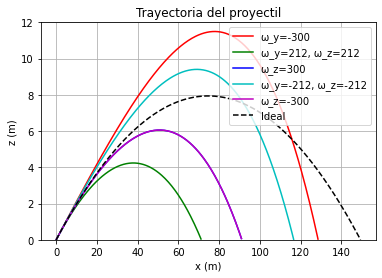

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición del vector global de velocidad angular
def magnus_proyectil(t, x, w):
    D = 7.2008e-2  # Diámetro
    m = 1.5947e-1  # Masa
    k = 1.22 * np.pi * D**2 / (8 * m)
    Cd = 0.45
    wRot = np.linalg.norm(w)  # Magnitud del vector de velocidad angular
    Cl = 0.3187 * (1 - np.exp(-2.483e-3 * wRot))

    v = np.sqrt(x[1]**2 + x[3]**2 + x[5]**2)  # Velocidad

    if wRot != 0:
        der = [
            x[1],
            -k * v * (Cd * x[1] - Cl * (w[1] * x[5] - w[2] * x[3]) / wRot),
            x[3],
            -k * v * (Cd * x[3] - Cl * (w[2] * x[1] - w[0] * x[5]) / wRot),
            x[5],
            -9.8 - k * v * (Cd * x[5] - Cl * (w[0] * x[3] - w[1] * x[1]) / wRot)
        ]
    else:
        der = [
            x[1],
            -k * v * Cd * x[1],
            x[3],
            -k * v * Cd * x[3],
            x[5],
            -9.8 - k * v * Cd * x[5]
        ]

    return der

# Evento para detener la simulación al tocar el suelo
def stop_magnus(t, x):
    return x[4]  # Condición: detener cuando z = 0
stop_magnus.terminal = True
stop_magnus.direction = -1

# Condiciones iniciales
th = 12 * np.pi / 180  # Ángulo de disparo en radianes
v0 = 60  # Velocidad inicial en m/s
x0 = [0, v0 * np.cos(th), 0, 0, 0, v0 * np.sin(th)]  # [x(0), vx(0), y(0), vy(0), z(0), vz(0)]
T = v0 * np.sin(th) / 4.9  # Tiempo sin rozamiento

# Definir los diferentes casos de velocidad angular
w_cases = [
    [0, -300, 0],
    [0, 212, 212],
    [0, 0, 300],
    [0, -212, -212],
    [0, 0, -300]
]

# Colores y etiquetas para las trayectorias
colors = ['r', 'g', 'b', 'c', 'm']
labels = [
    '\u03c9_y=-300',
    '\u03c9_y=212, \u03c9_z=212',
    '\u03c9_z=300',
    '\u03c9_y=-212, \u03c9_z=-212',
    '\u03c9_z=-300'
]

# Gráficas
plt.figure()

for i, w in enumerate(w_cases):
    sol = solve_ivp(
        lambda t, x: magnus_proyectil(t, x, w),
        [0, 2 * T],
        x0,
        events=stop_magnus,
        t_eval=np.linspace(0, 2 * T, 500)
    )
    plt.plot(sol.y[0], sol.y[4], color=colors[i], label=labels[i])

# Trazo de la trayectoria parabólica ideal (sin rozamiento)
x_parabola = np.linspace(0, v0 * np.cos(th) * T, 500)
z_parabola = v0 * np.sin(th) * x_parabola / (v0 * np.cos(th)) - 4.9 * (x_parabola / (v0 * np.cos(th)))**2
plt.plot(x_parabola, z_parabola, 'k--', label='Ideal')

# Configuración del gráfico
plt.grid(True)
plt.ylim([0, 12])
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.title('Trayectoria del proyectil')
plt.show()


## Código 6

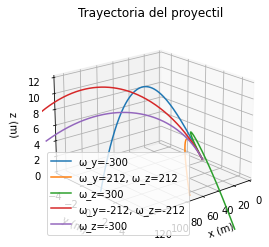

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición de la función Magnus
def magnus_proyectil(t, x):
    D = 7.2008e-2
    m = 1.5947e-1
    k = 1.22 * np.pi * D**2 / (8 * m)
    Cd = 0.45
    wRot = np.linalg.norm(w)
    Cl = 0.3187 * (1 - np.exp(-2.483e-3 * wRot))
    v = np.sqrt(x[1]**2 + x[3]**2 + x[5]**2)
    
    if wRot != 0:
        der = [
            x[1],
            -k * v * (Cd * x[1] - Cl * (w[1] * x[5] - w[2] * x[3]) / wRot),
            x[3],
            -k * v * (Cd * x[3] - Cl * (w[2] * x[1] - w[0] * x[5]) / wRot),
            x[5],
            -9.8 - k * v * (Cd * x[5] - Cl * (w[0] * x[3] - w[1] * x[1]) / wRot)
        ]
    else:
        der = [
            x[1],
            -k * v * Cd * x[1],
            x[3],
            -k * v * Cd * x[3],
            x[5],
            -9.8 - k * v * Cd * x[5]
        ]
    
    return der

# Evento para detener la simulación cuando z = 0
def stop_magnus_1(t, x):
    return x[4]

stop_magnus_1.terminal = True
stop_magnus_1.direction = -1

# Condiciones iniciales
th = 12 * np.pi / 180
v0 = 60
x0 = [0, v0 * np.cos(th), 0, 0, 0, v0 * np.sin(th)]
T = v0 * np.sin(th) / 4.9

# Simulación para diferentes velocidades angulares
w_values = [
    np.array([0, -300, 0]), 
    np.array([0, 212, 212]), 
    np.array([0, 0, 300]), 
    np.array([0, -212, -212]), 
    np.array([0, 0, -300])
]

trajectories = []
for w in w_values:
    sol = solve_ivp(magnus_proyectil, [0, 2 * T], x0, events=stop_magnus_1, t_eval=np.linspace(0, 2 * T, 500))
    trajectories.append(sol)

# Gráficas 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, sol in enumerate(trajectories):
    ax.plot(sol.y[0], sol.y[2], sol.y[4])

ax.set_xlim(0, max(trajectories[0].y[0]))
ax.set_ylim(-5, 5)
ax.set_zlim(0, 12)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_title('Trayectoria del proyectil')
ax.view_init(20, 50)  # Ajuste del ángulo de vista

ax.legend(['ω_y=-300', 'ω_y=212, ω_z=212', 'ω_z=300', 'ω_y=-212, ω_z=-212', 'ω_z=-300'])
plt.grid(True)
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from tkinter import Tk, Label, Entry, Button, messagebox

# Definición de la función Magnus
def magnus_proyectil(t, x, w):
    D = 7.2008e-2
    m = 1.5947e-1
    k = 1.22 * np.pi * D**2 / (8 * m)
    Cd = 0.45
    wRot = np.linalg.norm(w)
    Cl = 0.3187 * (1 - np.exp(-2.483e-3 * wRot))
    v = np.sqrt(x[1]**2 + x[3]**2 + x[5]**2)
    
    if wRot != 0:
        der = [
            x[1],
            -k * v * (Cd * x[1] - Cl * (w[1] * x[5] - w[2] * x[3]) / wRot),
            x[3],
            -k * v * (Cd * x[3] - Cl * (w[2] * x[1] - w[0] * x[5]) / wRot),
            x[5],
            -9.8 - k * v * (Cd * x[5] - Cl * (w[0] * x[3] - w[1] * x[1]) / wRot)
        ]
    else:
        der = [
            x[1],
            -k * v * Cd * x[1],
            x[3],
            -k * v * Cd * x[3],
            x[5],
            -9.8 - k * v * Cd * x[5]
        ]
    
    return der

# Evento para detener la simulación cuando z = 0
def stop_magnus_1(t, x, *args):
    return x[4]

stop_magnus_1.terminal = True
stop_magnus_1.direction = -1

# Función para simular y graficar
def simulate_and_plot():
    try:
        # Lectura de los valores desde la interfaz
        v0 = float(v0_entry.get())
        angle = float(angle_entry.get()) * np.pi / 180
        w_values = [
            np.array([0, float(wy1_entry.get()), float(wz1_entry.get())]),
            np.array([0, float(wy2_entry.get()), float(wz2_entry.get())]),
            np.array([0, float(wy3_entry.get()), float(wz3_entry.get())]),
            np.array([0, float(wy4_entry.get()), float(wz4_entry.get())]),
            np.array([0, float(wy5_entry.get()), float(wz5_entry.get())]),
        ]

        # Condiciones iniciales
        x0 = [0, v0 * np.cos(angle), 0, 0, 0, v0 * np.sin(angle)]
        T = v0 * np.sin(angle) / 4.9

        # Simulación para cada velocidad angular
        trajectories = []
        for w in w_values:
            sol = solve_ivp(
                magnus_proyectil, 
                [0, 2 * T], 
                x0, 
                args=(w,), 
                events=stop_magnus_1, 
                t_eval=np.linspace(0, 2 * T, 500)
            )
            trajectories.append(sol)

        # Gráficas 3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        for i, sol in enumerate(trajectories):
            ax.plot(sol.y[0], sol.y[2], sol.y[4])

        ax.set_xlim(0, max(trajectories[0].y[0]))
        ax.set_ylim(-5, 5)
        ax.set_zlim(0, 12)
        ax.set_xlabel('x (m)')
        ax.set_ylabel('y (m)')
        ax.set_zlabel('z (m)')
        ax.set_title('Trayectoria del proyectil')
        ax.view_init(20, 50)

        ax.legend([
            'ω_y={}, ω_z={}'.format(w[1], w[2]) for w in w_values
        ])
        plt.grid(True)
        plt.show()
    
    except ValueError:
        messagebox.showerror("Error", "Por favor, ingresa valores numéricos válidos.")

# Interfaz gráfica con Tkinter
root = Tk()
root.title("Simulación Magnus")

# Entradas de datos
Label(root, text="Velocidad inicial (m/s):").grid(row=0, column=0)
v0_entry = Entry(root)
v0_entry.grid(row=0, column=1)
v0_entry.insert(0, "60")

Label(root, text="Ángulo inicial (°):").grid(row=1, column=0)
angle_entry = Entry(root)
angle_entry.grid(row=1, column=1)
angle_entry.insert(0, "12")

# Velocidades angulares
Label(root, text="ω_y1:").grid(row=2, column=0)
wy1_entry = Entry(root)
wy1_entry.grid(row=2, column=1)
wy1_entry.insert(0, "-300")

Label(root, text="ω_z1:").grid(row=2, column=2)
wz1_entry = Entry(root)
wz1_entry.grid(row=2, column=3)
wz1_entry.insert(0, "0")

Label(root, text="ω_y2:").grid(row=3, column=0)
wy2_entry = Entry(root)
wy2_entry.grid(row=3, column=1)
wy2_entry.insert(0, "212")

Label(root, text="ω_z2:").grid(row=3, column=2)
wz2_entry = Entry(root)
wz2_entry.grid(row=3, column=3)
wz2_entry.insert(0, "212")

Label(root, text="ω_y3:").grid(row=4, column=0)
wy3_entry = Entry(root)
wy3_entry.grid(row=4, column=1)
wy3_entry.insert(0, "0")

Label(root, text="ω_z3:").grid(row=4, column=2)
wz3_entry = Entry(root)
wz3_entry.grid(row=4, column=3)
wz3_entry.insert(0, "300")

Label(root, text="ω_y4:").grid(row=5, column=0)
wy4_entry = Entry(root)
wy4_entry.grid(row=5, column=1)
wy4_entry.insert(0, "-212")

Label(root, text="ω_z4:").grid(row=5, column=2)
wz4_entry = Entry(root)
wz4_entry.grid(row=5, column=3)
wz4_entry.insert(0, "-212")

Label(root, text="ω_y5:").grid(row=6, column=0)
wy5_entry = Entry(root)
wy5_entry.grid(row=6, column=1)
wy5_entry.insert(0, "0")

Label(root, text="ω_z5:").grid(row=6, column=2)
wz5_entry = Entry(root)
wz5_entry.grid(row=6, column=3)
wz5_entry.insert(0, "-300")

# Botón para graficar
Button(root, text="Simular y Graficar", command=simulate_and_plot).grid(row=7, column=0, columnspan=4)

root.mainloop()
